In [81]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pytrends in c:\users\ketan\anaconda3\lib\site-packages (4.9.2)



In [82]:
pip install plotly

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrend library and keyword define

In [84]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "cloud computing"

# Data Request

In [85]:
pytrends.build_payload([keyword], cat = 0, timeframe= 'today 12-m', geo='', gprop ='')

# Country wise interest 

In [86]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

C:\Users\Ketan\AppData\Local\Temp\ipykernel_22072\2962278518.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




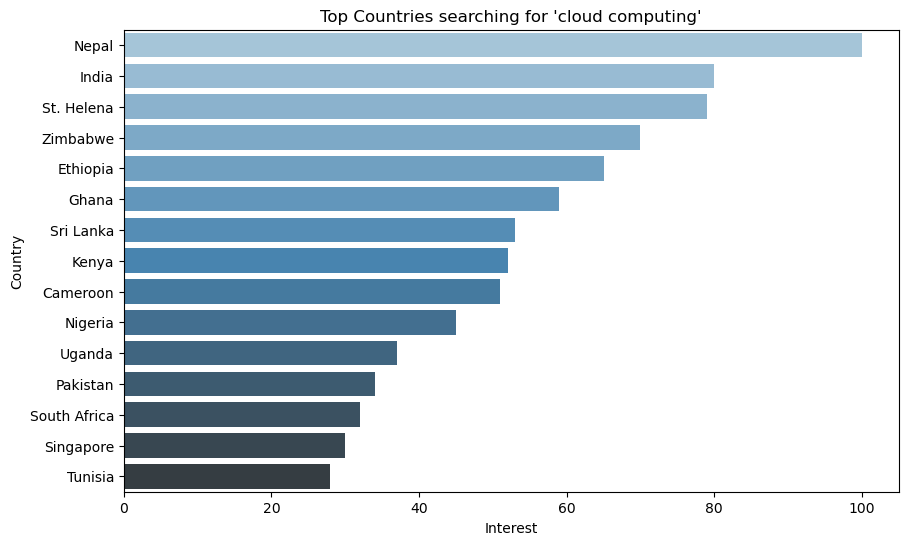

In [87]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword],y = region_data.index, palette ="Blues_d")
plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

In [88]:
region_data = region_data.reset_index()
fig = px. choropleth(region_data,
          locations= 'geoName',
          locationmode='country names', 
         color= keyword,
        title= f"Search Interest for '(keyword)' by Country",
         color_continuous_scale='Blues')
fig.show()

# Time wise interest

In [89]:
time_df = pytrends.interest_over_time()

C:\Users\Ketan\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



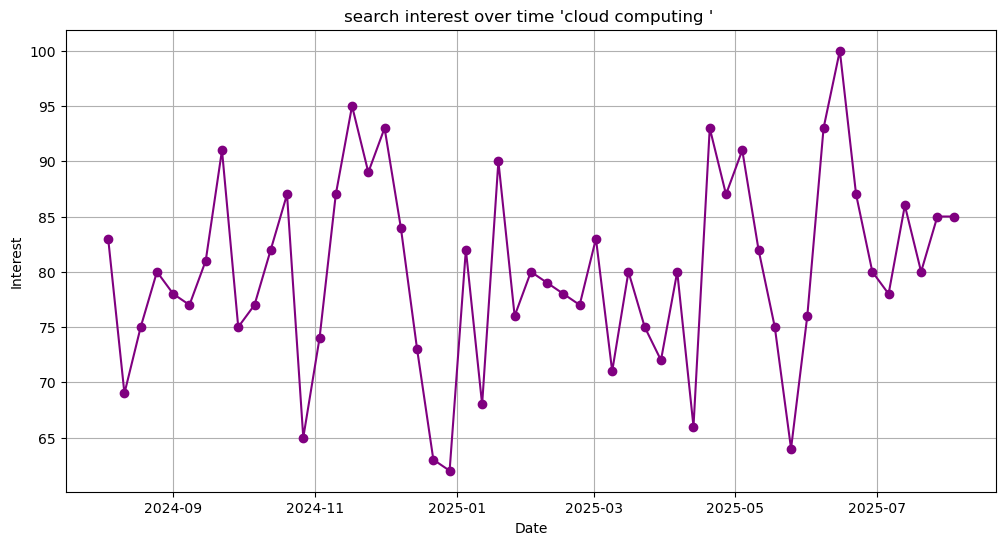

In [90]:
plt.figure(figsize= (12,6))
plt.plot(time_df.index, time_df[keyword], marker ='o', color = 'purple')
plt.title(f"search interest over time '{keyword} ' ")
plt. xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple keywords compare

In [91]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat= 0, timeframe = 'today 12-m', geo ='',gprop='')


C:\Users\Ketan\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



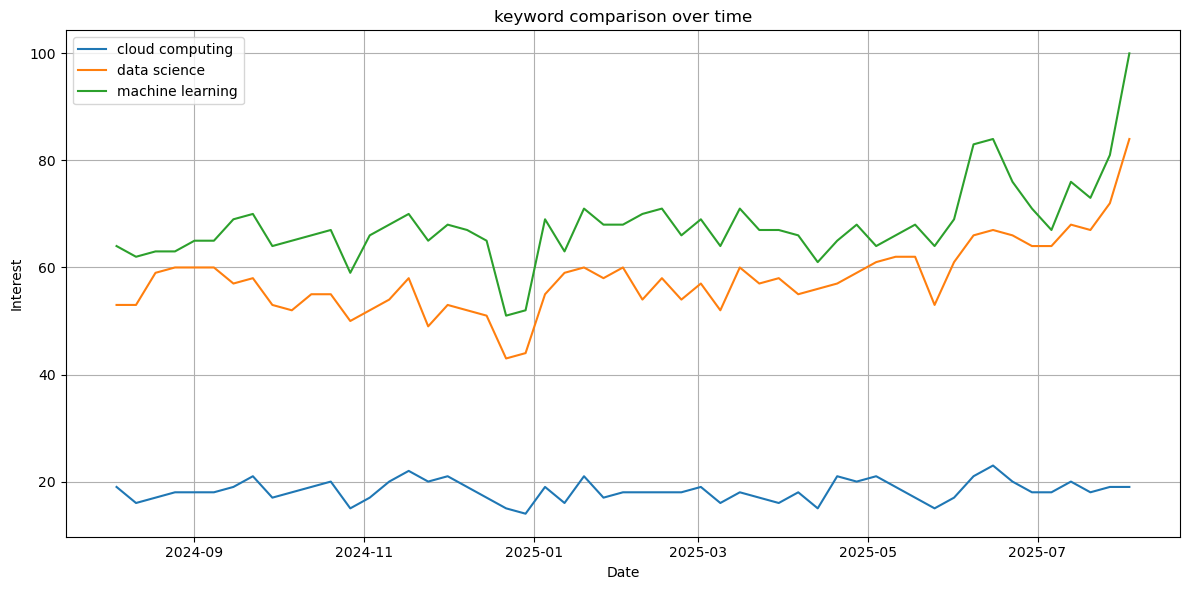

In [92]:
compare_df = pytrends.interest_over_time()
plt. figure(figsize= (12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)
plt.title("keyword comparison over time")
plt.xlabel ("Date")
plt.ylabel("Interest" )
plt.legend ()
plt.grid (True)
plt.tight_layout()
plt.show()